In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from data.dataset import ModelNet40, collate_fn
import os
import numpy as np

from utils import *
from model2 import *
from torch.utils.data import DataLoader, Subset
import torch
from evaluate import *
from train import train

In [3]:
device = 'cpu'
if torch.cuda.is_available():
    device = 'cuda'
device

'cuda'

### Getting the dataset path

In [4]:
os.chdir('..')
modelnet40_path = os.path.join(os.getcwd(), 'ModelNet40')
os.chdir('TransformersFor3dPointCLouds')
print(modelnet40_path)

/scratch/users/ahamadeh18/COMP390/ModelNet40


### Initalizing the training set DataLoader object

In [5]:
SAMPLE_SIZE = 128
TEST = False
SAMPLING_METHOD = 'fps'
batch_size = 5

In [6]:
dataset = ModelNet40(dataset_path=modelnet40_path, test=TEST, sample_size=SAMPLE_SIZE, sampling=SAMPLING_METHOD)

In [7]:
class_ind_dist = dataset.class_indicies_distribution()

In [8]:
overfit_classes_num = 4
OVERFITTING_SAMPLE_SIZE = 10
overfitting_set = []
for i in range(overfit_classes_num):
    overfitting_set += class_ind_dist[i][:OVERFITTING_SAMPLE_SIZE]

In [9]:
overfitting_subset = Subset(dataset, overfitting_set)
overfitting_loader = DataLoader(overfitting_subset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)

## Overfitting the model

In [10]:
from torch.nn import CrossEntropyLoss
from torch.nn import NLLLoss

class_weights =  torch.tensor(dataset.class_weights).float()
criterion = CrossEntropyLoss(weight=class_weights)
# criterion = CrossEntropyLoss()

In [11]:
in_features = 3
feature_dim = 128
out_features = 1024
decoder_features = 256
k_size = 4
NUM_CLASSES = 40

In [12]:
model = PointCloudClassifier(in_features, feature_dim, out_features, decoder_features, k_size, NUM_CLASSES)

self.in_features: 3 | feature_dim: 128


In [13]:
from torch.optim import SGD
from torch.optim.lr_scheduler import CosineAnnealingLR

parameters = model.parameters()
learning_rate = 1e-2
momentum = 0.9
weight_decay = 1e-7

optimizer = SGD(parameters, lr=learning_rate, momentum=momentum)

step = len(dataset)
scheduler = CosineAnnealingLR(optimizer, step)

In [14]:
epochs = 20
loss = train(model=model, optimizer=optimizer,
          scheduler=scheduler, train_loader=overfitting_loader,
          criterion=criterion, epochs=epochs, verbose=False)

100%|██████████| 8/8 [00:17<00:00,  2.18s/it]


epoch: 0 | loss: 29.921715021133423
Epoch time: 17.456798553466797


100%|██████████| 8/8 [00:08<00:00,  1.11s/it]


epoch: 1 | loss: 30.785698175430298
Epoch time: 8.867480516433716


100%|██████████| 8/8 [00:08<00:00,  1.08s/it]


epoch: 2 | loss: 29.51903748512268
Epoch time: 8.663058757781982


100%|██████████| 8/8 [00:09<00:00,  1.14s/it]


epoch: 3 | loss: 30.128559350967407
Epoch time: 9.125802040100098


100%|██████████| 8/8 [00:08<00:00,  1.08s/it]


epoch: 4 | loss: 29.814393043518066
Epoch time: 8.62761402130127


100%|██████████| 8/8 [00:08<00:00,  1.08s/it]


epoch: 5 | loss: 30.43307113647461
Epoch time: 8.676005363464355


100%|██████████| 8/8 [00:08<00:00,  1.05s/it]


epoch: 6 | loss: 30.15332007408142
Epoch time: 8.367471694946289


100%|██████████| 8/8 [00:08<00:00,  1.07s/it]


epoch: 7 | loss: 29.479408502578735
Epoch time: 8.561205863952637


100%|██████████| 8/8 [00:08<00:00,  1.07s/it]


epoch: 8 | loss: 31.348066806793213
Epoch time: 8.543140172958374


100%|██████████| 8/8 [00:08<00:00,  1.08s/it]


epoch: 9 | loss: nan
Epoch time: 8.635354995727539


100%|██████████| 8/8 [00:08<00:00,  1.09s/it]


epoch: 10 | loss: nan
Epoch time: 8.741054773330688


100%|██████████| 8/8 [00:08<00:00,  1.05s/it]


epoch: 11 | loss: nan
Epoch time: 8.388202667236328


100%|██████████| 8/8 [00:08<00:00,  1.11s/it]


epoch: 12 | loss: nan
Epoch time: 8.8986177444458


100%|██████████| 8/8 [00:08<00:00,  1.06s/it]


epoch: 13 | loss: nan
Epoch time: 8.506550550460815


100%|██████████| 8/8 [00:09<00:00,  1.16s/it]


epoch: 14 | loss: nan
Epoch time: 9.247734785079956


100%|██████████| 8/8 [00:09<00:00,  1.15s/it]


epoch: 15 | loss: nan
Epoch time: 9.175760269165039


100%|██████████| 8/8 [00:09<00:00,  1.17s/it]


epoch: 16 | loss: nan
Epoch time: 9.326294660568237


100%|██████████| 8/8 [00:08<00:00,  1.04s/it]


epoch: 17 | loss: nan
Epoch time: 8.296131134033203


100%|██████████| 8/8 [00:09<00:00,  1.14s/it]


epoch: 18 | loss: nan
Epoch time: 9.113228559494019


100%|██████████| 8/8 [00:08<00:00,  1.08s/it]

epoch: 19 | loss: nan
Epoch time: 8.66580080986023
Final loss nan


### Plotting the loss:

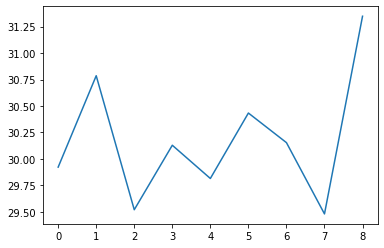

In [15]:
import matplotlib.pyplot as plt
plt.plot(loss)

In [16]:
accuracy = eval_2(model, overfitting_loader)

In [17]:
print(f'{accuracy}%')

22.5%


In [18]:
x = dataset[0][0].view(1, 128, 3)
yhat = model(x.float())
yhat

tensor([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]],
       grad_fn=<AddmmBackward0>)

In [19]:
softmax = torch.nn.Softmax()(yhat)
softmax

/kuacc/apps/anaconda/5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


tensor([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]],
       grad_fn=<SoftmaxBackward0>)

In [20]:
torch.argmax(softmax)

tensor(0)

### Creating the model

In [21]:
in_features = 3
feature_dim = 128
out_features = 1024
decoder_features = 256
k_size = 4
NUM_CLASSES = 40

In [22]:
model = PointCloudClassifier(in_features, feature_dim, out_features, decoder_features, k_size, NUM_CLASSES)

self.in_features: 3 | feature_dim: 128


### Dataset

In [23]:
SAMPLE_SIZE = 128
TEST = False
SAMPLING_METHOD = 'fps'

model_net40 = ModelNet40(dataset_path=modelnet40_path, test=TEST, sample_size=SAMPLE_SIZE, sampling=SAMPLING_METHOD)

### Optimizer:

In [24]:
from torch.optim import SGD
from torch.optim.lr_scheduler import CosineAnnealingLR

parameters = model.parameters()
learning_rate = 1e-3
momentum = 0.9

optimizer = SGD(parameters, lr=learning_rate, momentum=momentum)

step = len(model_net40)
scheduler = CosineAnnealingLR(optimizer, step)

## Training the model

### DataLoader

In [25]:
batch_size = 128

In [26]:
from torch.utils.data import DataLoader

train_loader = DataLoader(model_net40, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)

### Optimizer:

In [27]:
from torch.optim import SGD
from torch.optim.lr_scheduler import CosineAnnealingLR

parameters = model.parameters()
learning_rate = 1e-4
momentum = 0.9

optimizer = SGD(parameters, lr=learning_rate, momentum=momentum)

step = len(model_net40)
scheduler = CosineAnnealingLR(optimizer, step)

### Loss function:

In [28]:
from torch.nn import CrossEntropyLoss
from torch.nn import NLLLoss

class_weights = torch.tensor(model_net40.class_weights).float()
criterion = CrossEntropyLoss(weight=class_weights)

In [ ]:
epochs = 10
loss = train(model=model, optimizer=optimizer,
          scheduler=scheduler, train_loader=train_loader,
          criterion=criterion, epochs=epochs, save_params=True, verbose=False, load_model=False)

100%|██████████| 77/77 [27:27<00:00, 21.39s/it]


epoch: 0 | loss: 290.16918444633484
Epoch time: 1647.4102654457092


100%|██████████| 77/77 [27:25<00:00, 21.37s/it]


epoch: 1 | loss: 290.5951235294342
Epoch time: 1645.5314455032349


100%|██████████| 77/77 [27:26<00:00, 21.38s/it]


epoch: 2 | loss: 290.51247549057007
Epoch time: 1646.2706401348114


100%|██████████| 77/77 [27:26<00:00, 21.38s/it]


epoch: 3 | loss: 289.8480145931244
Epoch time: 1646.2923140525818


 34%|███▍      | 26/77 [09:14<16:21, 19.24s/it]

## Model Evaluation:

### Loading the test set:

In [ ]:
SAMPLE_SIZE = 128
TEST = True
SAMPLING_METHOD = 'fps'
batch_size = 1

model_net_256_test = ModelNet40(dataset_path=modelnet40_path, test=TEST, sample_size=SAMPLE_SIZE, sampling=SAMPLING_METHOD)
test_laoder = DataLoader(model_net_256_test, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)

In [ ]:
evaluate(model, model_net_256_test, epochs, verbose=True)

In [ ]:
data, label, _ = model_net_256_test[0]

In [ ]:
yhat = model(data.float())
print(label)
print((torch.argmax(yhat) == label).item())

In [ ]:
accuracy = 0
N = len(model_net_256_test)
model.eval()
for point in model_net_256_test:
    if point == None:
        N -= 1
        continue
    x, y, _ = point
    yhat = model(x.float())
    
    if (torch.argmax(yhat) == y).item():
        accuracy += 1

In [ ]:
acc = accuracy / N

In [ ]:
acc